Reuben Feinman

Math Tools for Neural and Cog. Sci.

Homework #4

11/2/17

# Problem #1

## (a)

Let $B$ denote the case that Mom's second gene is the dominant brown-eyed gene, and $b$ the case that it is the recessive blue-eyed gene. We are given the prior probabilities $P(B) = P(b) = \frac{1}{2}$. Given our observation, $O$, that the child has brown eyes, we can define the conditional probabilities of this observation for each case of Mom as follows (using understanding of genetics):

$P(O|B) = 1$

$P(O|b) = \frac{1}{2}$

Now, what we ultimately want to compute is $P(O|b)$. To do this, we use Baye's Rule:

$P(b|O) = \frac{P(O|b)*P(b)}{P(O)} = \frac{P(O|b)*P(b)}{P(O|b)*P(b) + P(O|B)*P(B)} 
= \frac{\frac{1}{2}*\frac{1}{2}}{\frac{1}{2}*\frac{1}{2} + 1*\frac{1}{2}} 
= \frac{\frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}$

So the probability is $\frac{1}{3}$.

## (b)

Now we have two observations, $O_1, O_2$. Assuming that these two events are conditionally independent (this would be the case in biology), we can compute our joint conditional probabilities as follows:

$P(O_1, O_2|B) = P(O_1|B)*P(O_2|B) = 1*1 = 1$

$P(O_1, O_2|b) = P(O_1|b)*P(O_2|b) = \frac{1}{2}*\frac{1}{2} = \frac{1}{4}$

We can use Baye's Rule to compute $P(b|O_1,O_2)$:

$P(b|O_1,O_2) = \frac{P(O_1,O_2|b)*P(b)}{P(O_1,O_2)} 
= \frac{P(O_1,O_2|b)*P(b)}{P(O_1,O_2|b)*P(b) + P(O_1,O_2|B)*P(B)} 
= \frac{\frac{1}{4}*\frac{1}{2}}{\frac{1}{4}*\frac{1}{2} + 1*\frac{1}{2}} 
= \frac{\frac{1}{8}}{\frac{5}{8}}
= \frac{1}{5}$.

So the probability is $\frac{1}{5}$.

## (c)

Extending upon the generalization we made to get from (a) to (b) above, we get an equation for our target probability as follows:
$
P(b|O_1, ..., O_N) = \frac{P(O_1, ..., O_N|b)*P(b)}{P(O_1, ..., O_N)} 
= \frac{P(O_1, ..., O_N|b)*P(b)}{P(O_1, ..., O_N|b)*P(b) + P(O_1, ..., O_N|B)*P(B)}
= \frac{P(O|b)^N*P(b)}{P(O|b)^N*P(b) + P(O|B)^N*P(B)}
= \frac{(\frac{1}{2})^N*\frac{1}{2}}{(\frac{1}{2})^N*\frac{1}{2} + (1)^N*\frac{1}{2}} 
= \frac{\frac{1}{2^{N+1}}}{\frac{1}{2^{N+1}} + \frac{1}{2}}
= \frac{1}{2^N + 1}
$

So the probability is $\frac{1}{2^N + 1}$.

# Problem #2

In [1]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
np.random.seed(0)

## (a)

In [2]:
def sample(values, p):
    """
    Draw samples from a discrete PDF 'p'
    using uniform inverse cumulative mapping.
    'Values' indicates the sample value 
    associated with each PDF entry in p
    """
    # first sample from uniform(0,1)
    u = np.random.uniform(low=0, high=1)
    # see where the sample 'u' falls within
    # our CDF, return corresponding value
    cdf = 0
    for val, prob in zip(values, p):
        cdf += prob
        if u <= cdf:
            return val

def randp(p, num):
    # Values contains the set of 10 values we will sample from
    values = np.arange(1, len(p)+1)
    # Iterate 'num' times, sampling from values each time using the 
    # discrete probability vector provided
    samples = [sample(values, p) for _ in range(num)]
    
    return np.asarray(samples)

In [3]:
# set p values so they are all equal, at 1/10 each.
p = np.ones(10)/10
samples = randp(p, 1000)

In [4]:
from collections import Counter

def histogram_discrete(samples, title=None):
    """
    A function that takes an array of categorical samples
    and plots a histogram showing the frequency of each
    category in the array.
    """
    counts = Counter(samples)
    values = list(counts.keys())
    frequencies = list(counts.values())
    plt.figure(figsize=(8, 6))
    plt.bar(values, frequencies)
    plt.xticks(values)
    if title is not None:
        plt.title(title, fontsize=22)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()
    
def histogram_continuous(samples, title=None, nbins=10):
    """
    A function that takes an array of numeric values and
    plots a histogram of the values, discretized into some
    pre-specified number of bins.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=nbins)
    if title is not None:
        plt.title(title, fontsize=22)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()

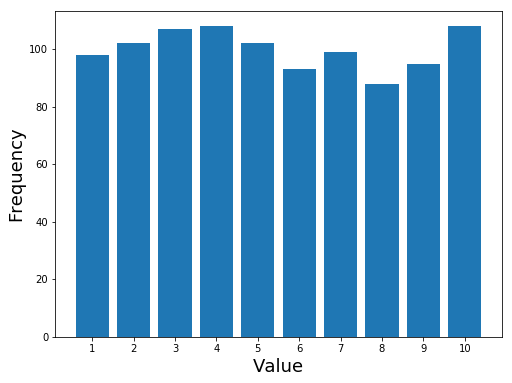

In [5]:
histogram_discrete(samples)

The bars look to be about equal height, which is what we'd expect given our p vector which assigns equal probability to each value.

## (b)

In [6]:
def psum(p, q):
    """
    This function takes as input the PDFs of two discrete
    RVs and returns the PDF of a new RV that is the sum of
    these two input RVs. 
    """
    
    # As we learned in class, to get the PDF for a new RV 
    # that is the sum of two independent discrete RVs, we 
    # simply compute a convolution of the two discrete PDFs.
    return np.convolve(p, q)

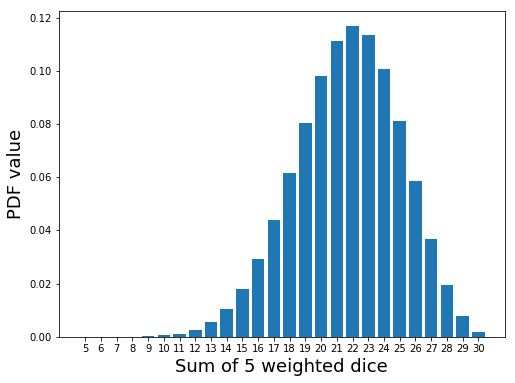

In [7]:
# Now let's test this function as described in the assignment,
# using a weighted die. First, compute the PDF of the die
p = np.arange(1,7)
p = p/np.sum(p)
# Now, compute the PDF for a sum of 5 such die
pdf = p
for _ in range(4):
    pdf = psum(p, pdf)
# Now lets plot the PDF to see what we've come up with
plt.figure(figsize=(8, 6))
plt.bar(range(5, 31), pdf)
plt.xticks(range(5, 31))
plt.xlabel('Sum of 5 weighted dice', fontsize=18)
plt.ylabel('PDF value', fontsize=18)
plt.show()

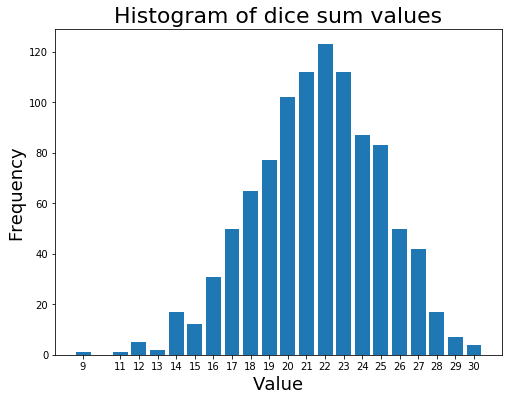

In [8]:
# Now let's verify this PDF empirically. Compute sum of 5 such
# RVs 1000 times. Plot histogram
vals = np.zeros(1000)
for _ in range(5):
    vals += randp(p, 1000)
histogram_discrete(vals, title='Histogram of dice sum values')

The empirical PDF does look quite similar to our theoretical PDF. Let's try increasing the number of samples and plotting it again:

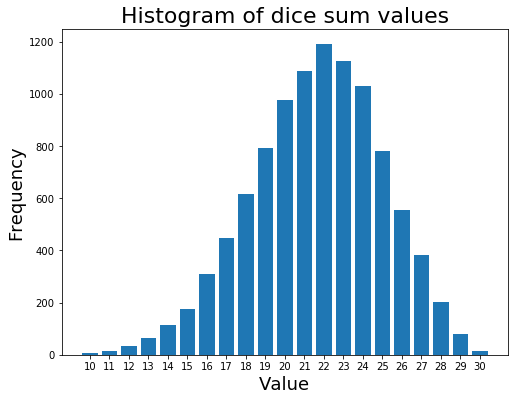

In [9]:
vals = np.zeros(10000)
for _ in range(5):
    vals += randp(p, 10000)
histogram_discrete(vals, title='Histogram of dice sum values')

Now we can say with high confidence that our empricial PDF matches our theoretical PDF. They have the same mean, and the shapes of the two curves are the same.

# Problem #3

## (a)

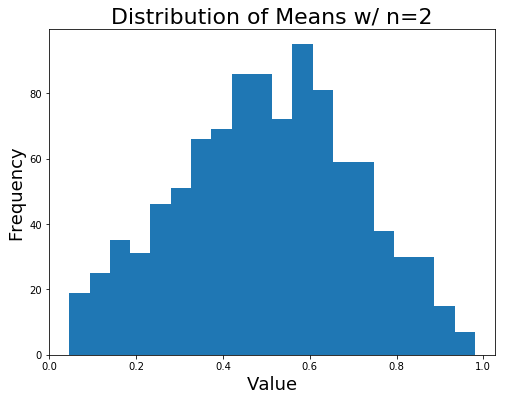

In [10]:
# Try it first with 1000 samples

# Sample 2 values from uniform(0,1) 1000 times 
samples = np.random.uniform(size=(1000, 2))
# Compute the mean of the 2 values for each of our 1000 trials
means = samples.mean(axis=1)
# Plot histogram of these 1000 means
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=2")

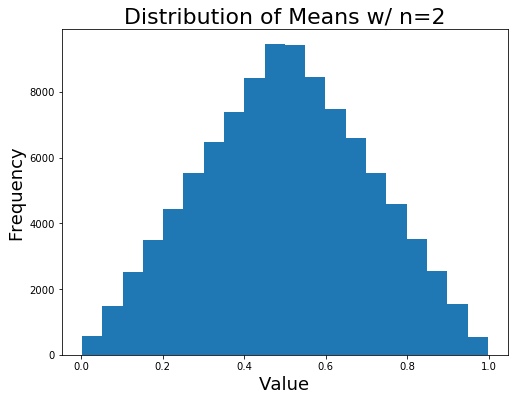

In [11]:
# Try it again with 100,000 samples
samples = np.random.uniform(size=(100000, 2))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=2")

This distribution has a pyramid-like shape. It's basically an upside-down V. Since $n$ is very small here ($n=2$), we have not quite converged to the Gaussian distribution yet, and hence we get these rigid-looking edges.

## (b)

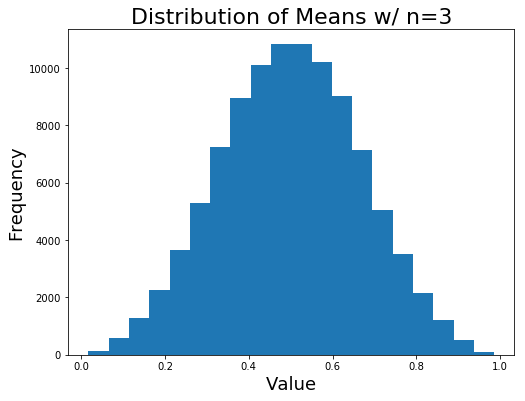

In [12]:
# Try n=3
samples = np.random.uniform(size=(100000, 3))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=3")

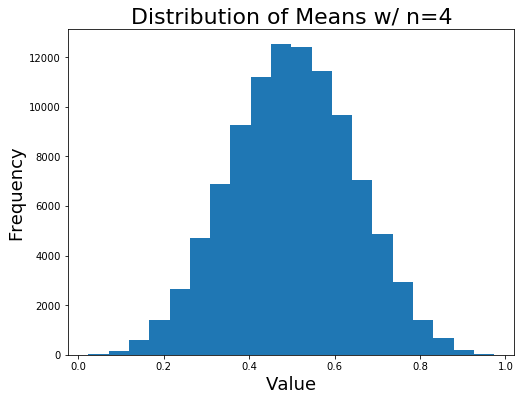

In [13]:
# Try n=4
samples = np.random.uniform(size=(100000, 4))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=4")

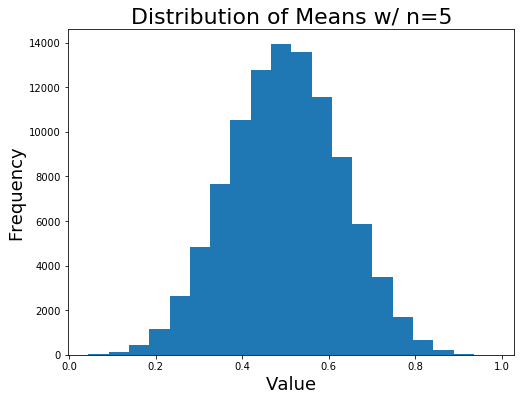

In [14]:
# Try n=5
samples = np.random.uniform(size=(100000, 5))
means = samples.mean(axis=1)
histogram_continuous(means, nbins=20, title="Distribution of Means w/ n=5")

The edges of the pyramid have started caving inward, making the curve look less like a pyramid and more like our Gaussian distribution. The curve starts looking normal around n=4.

## (c)

In [15]:
from scipy import stats

def normplot(x):
    """
    A function to replicate Matlab's "normplot" functionality. Takes
    a set of points and displays the Q-Q plot for these points.
    """
    plt.figure(figsize=(10,8))
    # Calculate quantiles and least-square-fit curve
    (quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')
    # Plot results
    plt.plot(values, quantiles,'ob', marker='+')
    plt.plot(quantiles * slope + intercept, quantiles, 'r')
    #define ticks
    ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
    # Transfrom them from precentile to cumulative density
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
    # Assign new ticks
    plt.yticks(ticks_quan,ticks_perc)
    plt.ylabel('Probability (%)', fontsize=18)
    plt.xlabel('Data', fontsize=18)
    plt.show()

Trial #1


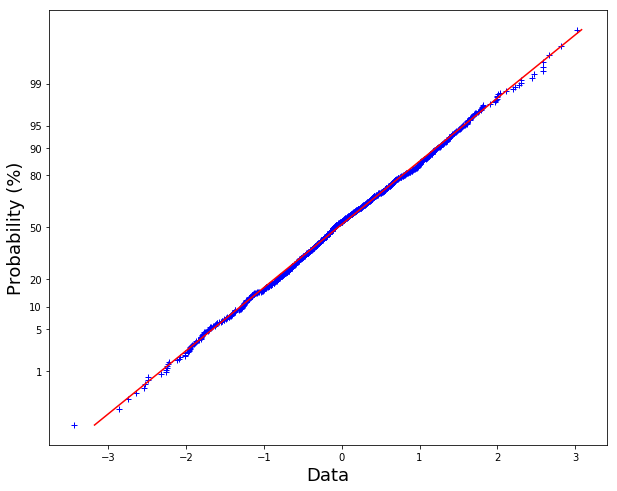

Trial #2


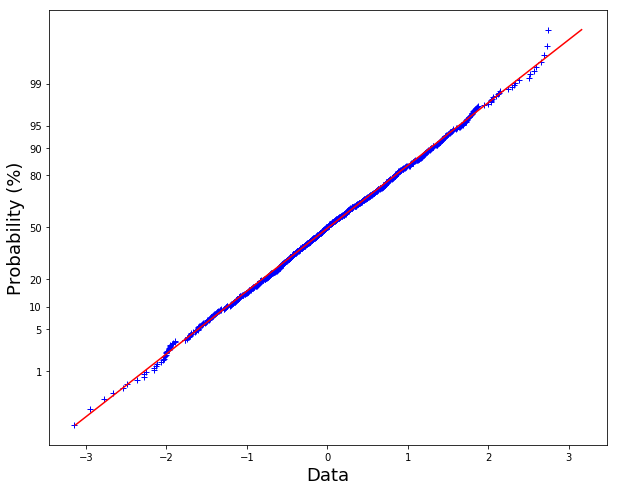

Trial #3


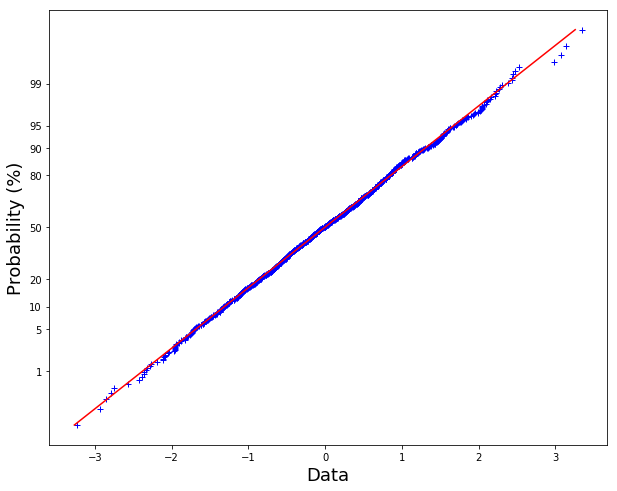

In [16]:
# Let's try sampling 1000 points from a Gaussian with mean 0 and
# scale 1. Repeat a few times and plot each time.
for i in range(1,4):
    print('Trial #%i' % i)
    x = np.random.normal(size=1000)
    normplot(x)

The plot varies only a little bit for each of the 3 runs. For the most part, we see a straight line as expected.

## (d)

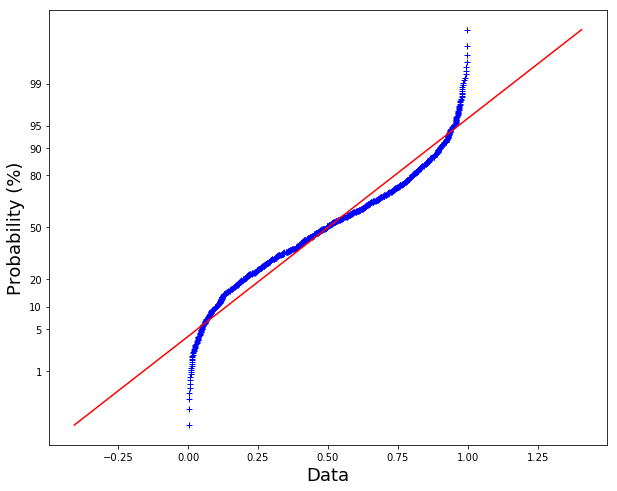

In [17]:
# Let's now try this type of plot w/ samples from a 
# uniform distribution
samples = np.random.uniform(size=1000)
normplot(samples)

The first thing to note is that there are no points below 0 or above 1. This makes sense since we are sampling form uniform [0,1]; while the Gaussian sampling (mean=0.5) will yield rare points outside of this range, the uniform sampling will not yield any. The low and high ends of the uniform normplot have a very large slope; this is because the lowest and highest quantiles of a uniform distribution have significantly more probability mass than a Gaussian distribution. At the middle quantiles (closer to the mean) we see the opposite: the uniform normplot has smaller slope than a Gaussian would, because there is less probability mass here for the uniform distribution than for the Gaussian distribution.

Trying with n=2:


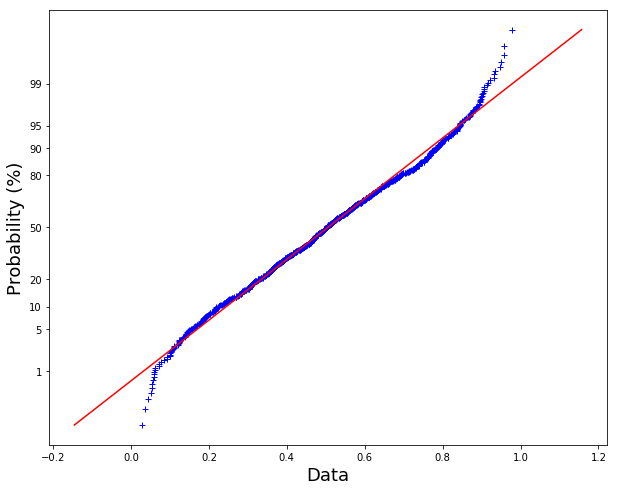

Trying with n=3:


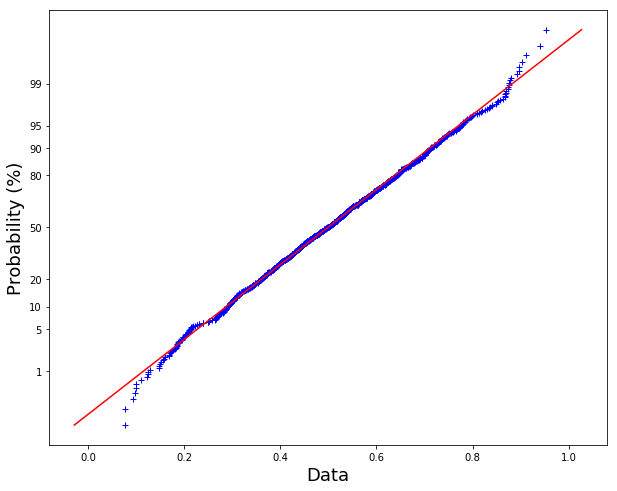

Trying with n=4:


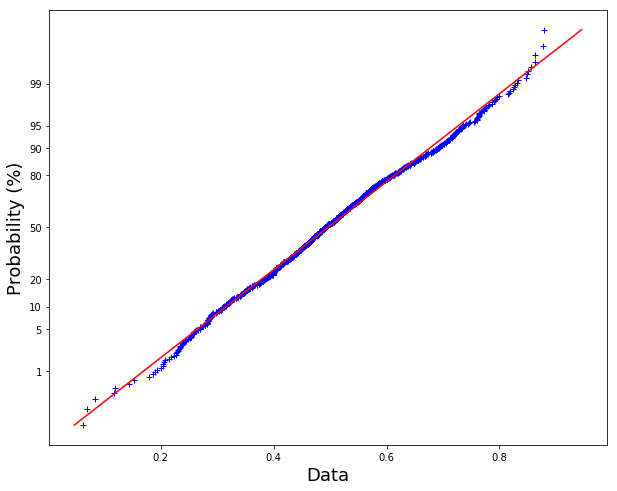

Trying with n=5:


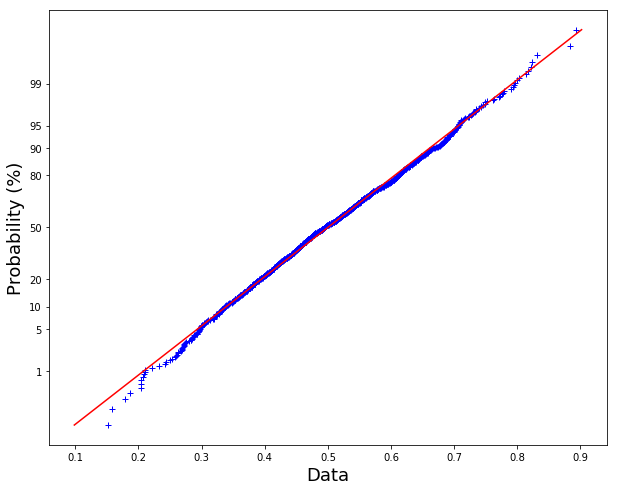

Trying with n=6:


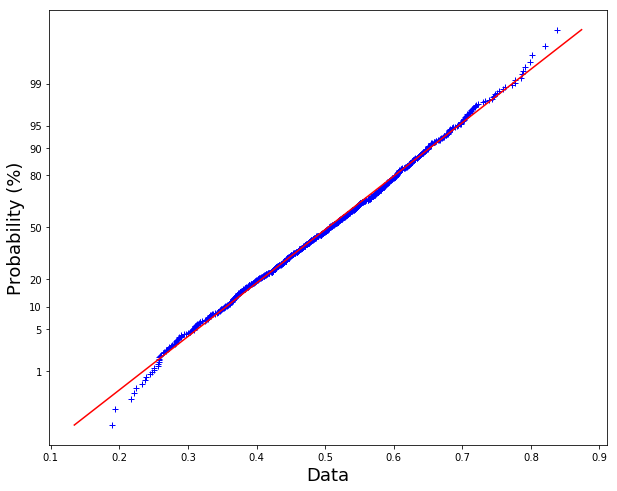

Trying with n=7:


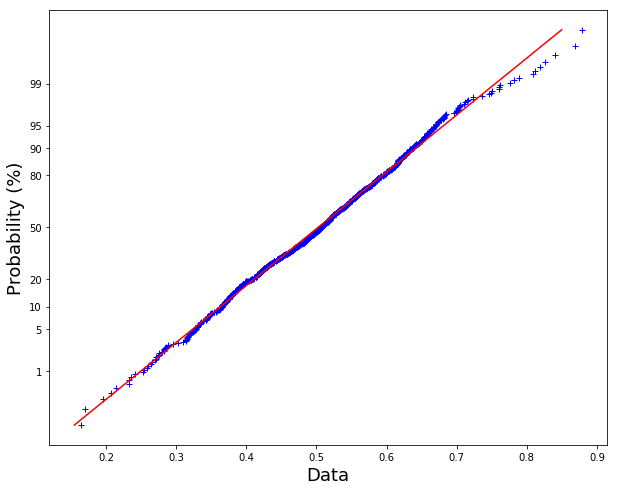

Trying with n=8:


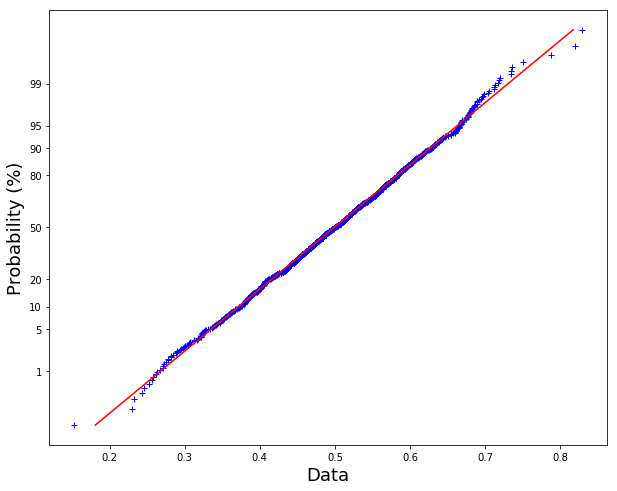

In [18]:
# Now let's try with the MEANS of a n-sample normal distribution.
# We will will vary the value of n from 2:8.

for n in range(2, 9):
    print("Trying with n=%i:" % n)
    samples = np.random.uniform(size=(1000, n))
    means = samples.mean(axis=1)
    normplot(means)

We can see that by the time we get to n=4, the line looks approximately linear like our Gaussian data. Thus, the sample size needs to be at least size 4.

# Problem #4

## (a)

Let $X \sim \mathcal{N}(\vec{\mu}, \Sigma)$ for some $\vec{\mu}\in\mathbb{R}^N$ and $\Sigma\in\mathbb{S}^n_{++}$. Then there exists a matrix $B\in\mathbb{R}^{n\times n}$ such that, if we define $Z = B^{-1}(X - \vec{\mu})$, then $Z \sim \mathcal{N}(0, I)$. Specifically, this matrix $B$ is defined as $B = U\Lambda^{1/2}$, where $U$ and $\Lambda$ are obtained from the eigenvalue decomposition of $\Sigma$, the covariance matrix ($\Sigma = U\Lambda U^T$). I will not step through the details of the proof here.

As result of this theorem, we can obtain samples $X$ from $\mathcal{N}(\vec{\mu}, \Sigma)$ by sampling $Z$ from $\mathcal{N}(0, I)$ and then applying the transformation $X = BZ + \vec{\mu}$.

In [19]:
import scipy.linalg as la

def ndRandn(mean, cov, num=1):
    """
    Function ndRandn computes random samples from
    a multivariate Gaussian distribution with mean vector
    'mean' and covariance matrix 'cov'.
    """
    # First, compute the eigenvalue decomposition of the
    # covariance matrix
    w, U = la.eigh(cov)
    # Now, compute B = UA^{1/2}
    w_sqrt = np.sqrt(w)
    B = np.matmul(U, np.diag(w_sqrt))
    # Now, sample from an N-dimensional Gaussian with mean=0
    # and the identity matrix as the covariance.
    Z = np.random.normal(size=(num, len(mean)))
    # Finally, apply the transformation X = BZ + mu
    X = np.matmul(B, Z.T) + mean.reshape(-1,1)
    
    return X.T

## (b)

In [20]:
# First create an arbitrary mean vector
mean = np.asarray([-3, 3])
print('Mean vector: ', mean)
# Now create an arbitrary covariance matrix. Covariance
# matrices must be positive semi-definite.
cov = np.asarray([[7, 4], [4, 12]])
print('Cov matrix: \n', cov)

Mean vector:  [-3  3]
Cov matrix: 
 [[ 7  4]
 [ 4 12]]


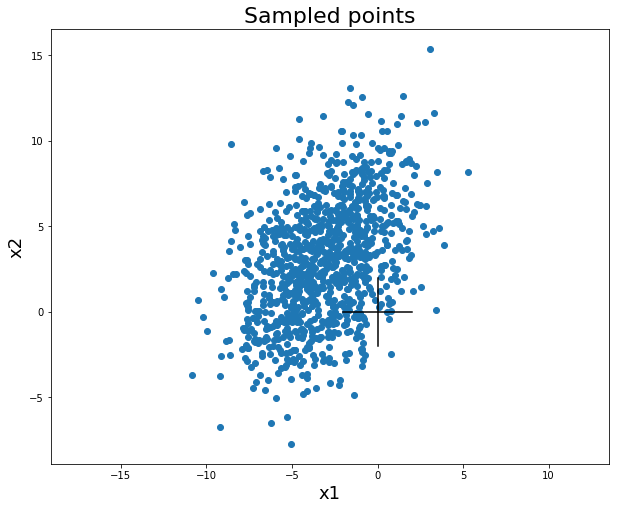

In [27]:
# Now, collect our samples
X = ndRandn(mean, cov, num=1000)
# Plot the samples
plt.figure(figsize=(10,8))
plt.axis('equal')
plt.plot([-2, 2], [0, 0], c='black') # X-axis
plt.plot([0, 0], [-2, 2], c='black') # Y-axis
plt.scatter(X[:,0], X[:,1]) # Data points
plt.title('Sampled points', fontsize=22)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.show()

In [28]:
# Get empirical mean and covariance statistics
mean_emp = X.mean(axis=0)
cov_emp = np.cov(X.T)
print('Empirical mean vector: ', mean_emp)
print('Empirical cov matrix: \n', cov_emp)
print('\n')

Empirical mean vector:  [-3.1283766   2.98517154]
Empirical cov matrix: 
 [[  6.85572125   3.93963437]
 [  3.93963437  12.36378401]]




Now we will need to compute the 95% confidence interval ellipse (i.e. 2 standard deviations). For a multivariate Gaussian with a diagonal covariance matrix (i.e. no covariance between variables), given diagonal entries $\sigma_x$ and $\sigma_y$, this equation can be written simply as

$ (\frac{x}{\sigma_x})^2 + (\frac{y}{\sigma_y})^2 = s$,

where $s$ defines the scale of the ellipse and is determined based on the target confidence level. Since we are targeting the 95% confidence interval, we use $s=5.991$ (see Chi-Square likelihood for 2D case). Thus we have an ellipse with major and minor axes of $\sigma_x\sqrt{5.991}$ and $\sigma_y\sqrt{5.991}$. 

In our case, we do not have a diagonal covariance matrix, so a slight modification must be performed. We need to first project our data into the axes of greatest variation (i.e. the principle components), found by performing an eigenvalue decomposition of our covariance matrix. Then, we compute the ellipse in this space. Recall that our eigenvalues $\lambda_1$ and $\lambda_2$ describe the variance along each principle component axis, and thus they are analogous to $\sigma_x^2$ and $\sigma_y^2$. Therefore, we have major and minor axes of $\sqrt{5.991\lambda_1}$ and $\sqrt{5.991\lambda_2}$. 

As a final step, once we've compute the ellipse, we must shift it by our mean vector in the original input space.

In [29]:
def create_ellipse(a, b):
    """
    A function that returns a set of 2D points that define
    an ellipse, using the equation x^2/a + y^2/b = 1.
    """
    # create theta vector
    thetas = np.array([2*np.pi*n/64 for n in range(65)])
    # generate the matrix P that defines our ellipse
    P = np.hstack([[[a*np.cos(theta)], [b*np.sin(theta)]] for theta in thetas])
    
    return P

In [30]:
# Compute eigenvalue decomposition of our covariance matrix
w, U = la.eigh(cov)
# Compute major and minor axes of our elipse using the eigenvalues
a = np.sqrt(w[0]*5.991)
b = np.sqrt(w[1]*5.991)
# Create an ellipse in the input space using these major and minor axes
P = create_ellipse(a, b)
# Project the ellipse into the principle component space
P_new = np.matmul(U, P)
# Finally, shift the ellipse by our mean vector
P_new += mean.reshape(-1,1)

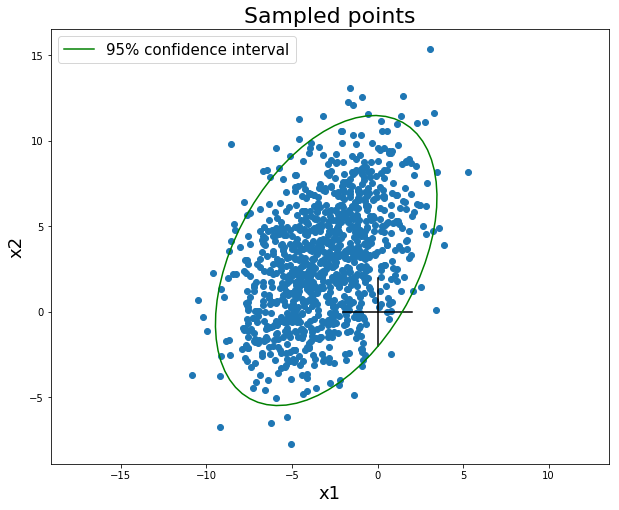

In [31]:
# Now plot ellipse on top of the points
plt.figure(figsize=(10,8))
plt.axis('equal')
plt.plot([-2, 2], [0, 0], c='black') # X-axis
plt.plot([0, 0], [-2, 2], c='black') # Y-axis
plt.scatter(X[:,0], X[:,1]) # Data points
plt.title('Sampled points', fontsize=22)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.plot(P_new[0], P_new[1], color='g', label='95% confidence interval')
plt.legend(prop={'size': 15})
plt.show()

Yes, this ellipse does capture the shape of our data. It looks well-formed with the data points that we sampled.

## (c)

Let $\vec{x} \sim \mathcal{N}(\vec{\mu}_x, \Sigma)$ be our 2-D Gaussian random variable. Assume that we project samples of this variable onto a unit vector $\vec{u}$ to obtain a new 1-D variable $z = \vec{u}^T\vec{x}$. We know from class that this 1-D variable will have a Gaussian distribution with mean and variance parameters as follows:

$\mu_z = \vec{u}^T\vec{\mu}_x$

$\sigma_z^2 = \vec{u}^T\Sigma\vec{u}$

Let's go ahead and test how well these predicted distributions match our empirical data.

u:  [ 1.  0.]


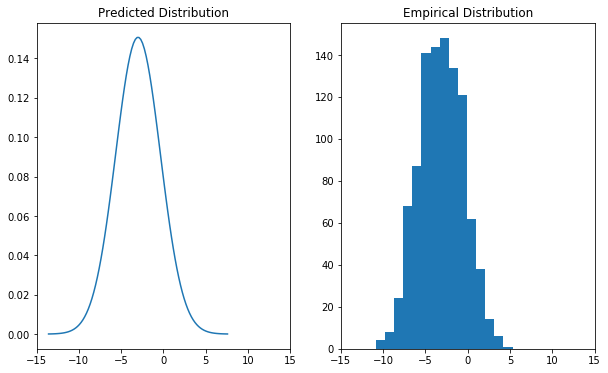

u:  [ 0.99144486  0.13052619]


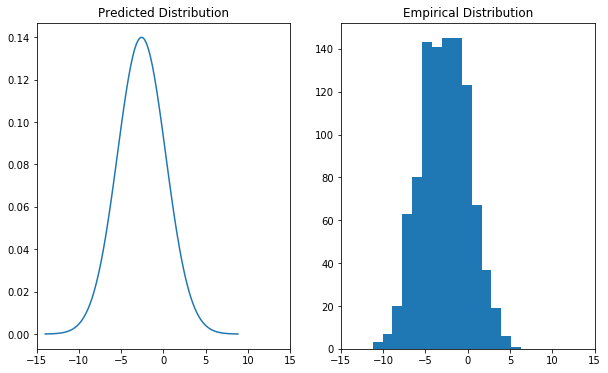

u:  [ 0.96592583  0.25881905]


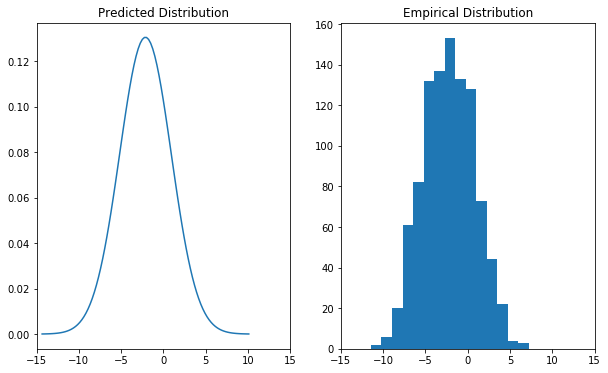

u:  [ 0.92387953  0.38268343]


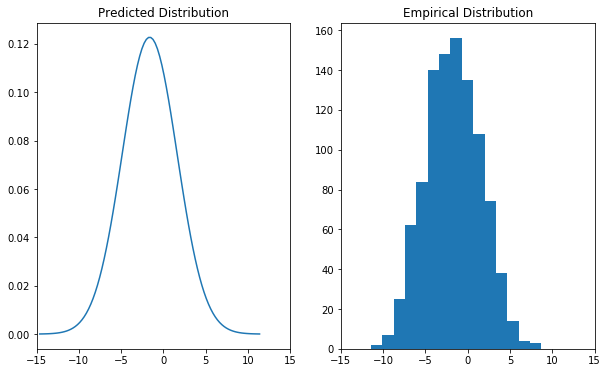

u:  [ 0.8660254  0.5      ]


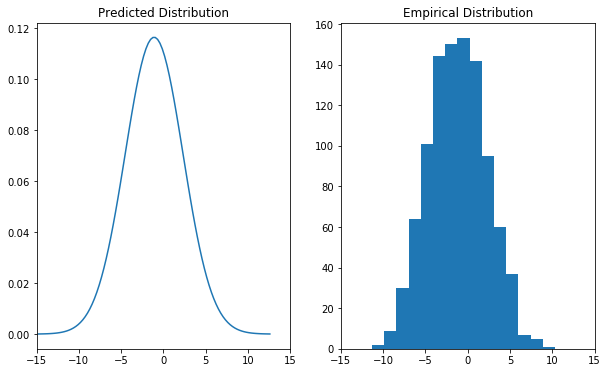

u:  [ 0.79335334  0.60876143]


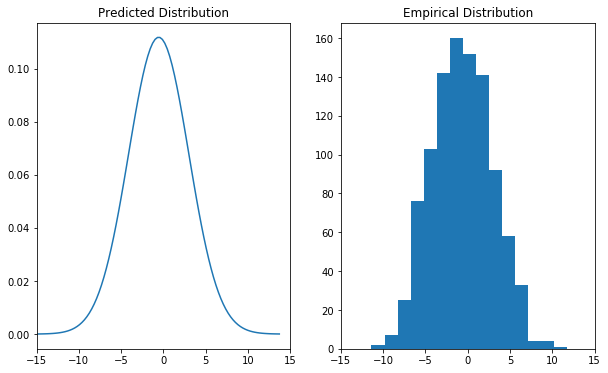

u:  [ 0.70710678  0.70710678]


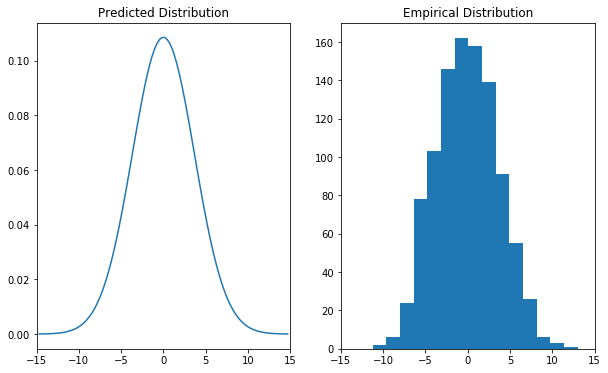

u:  [ 0.60876143  0.79335334]


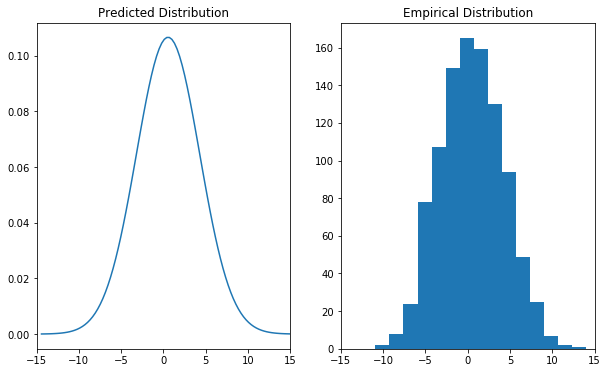

u:  [ 0.5        0.8660254]


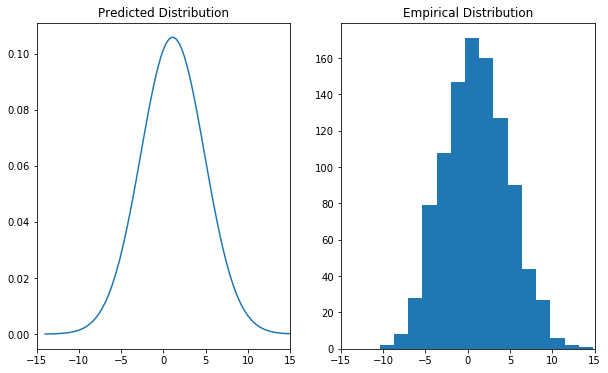

u:  [ 0.38268343  0.92387953]


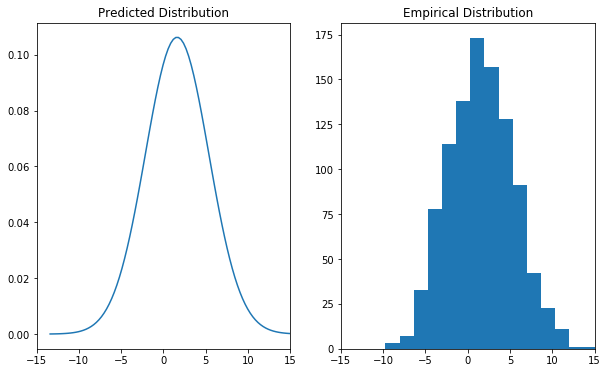

u:  [ 0.25881905  0.96592583]


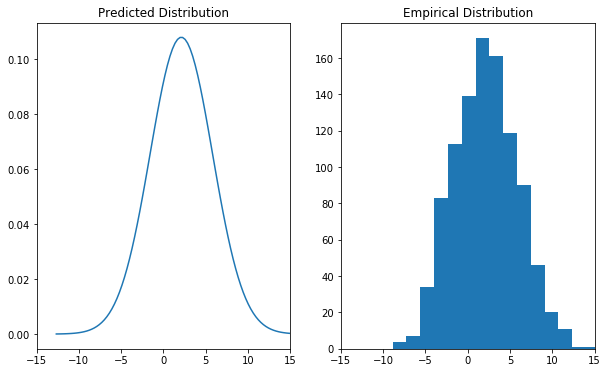

u:  [ 0.13052619  0.99144486]


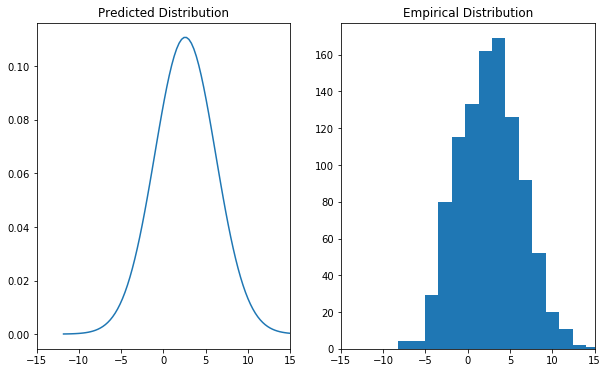

u:  [  6.12323400e-17   1.00000000e+00]


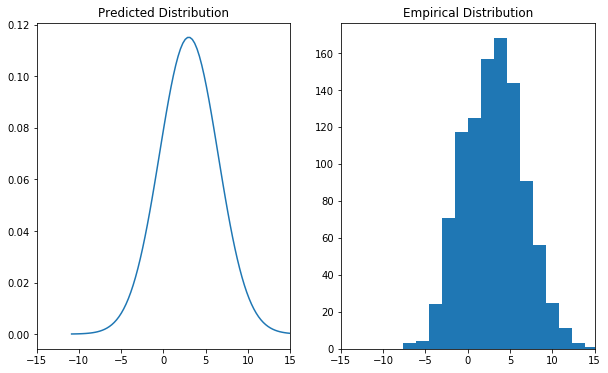

u:  [-0.13052619  0.99144486]


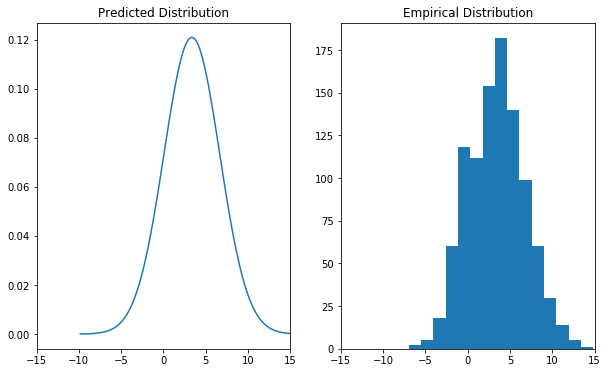

u:  [-0.25881905  0.96592583]


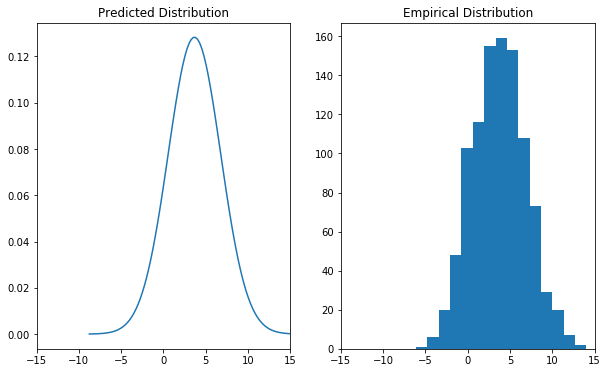

u:  [-0.38268343  0.92387953]


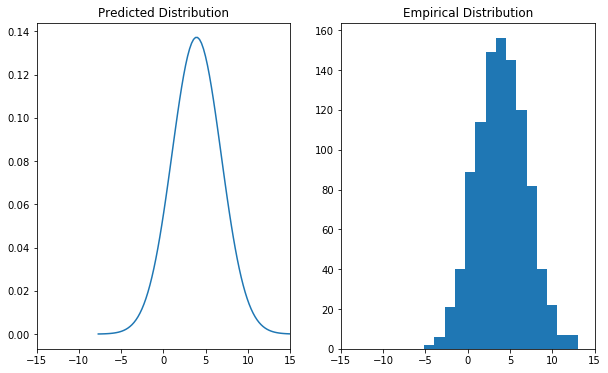

u:  [-0.5        0.8660254]


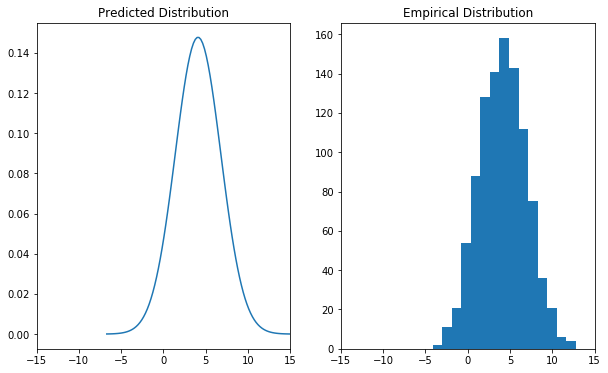

u:  [-0.60876143  0.79335334]


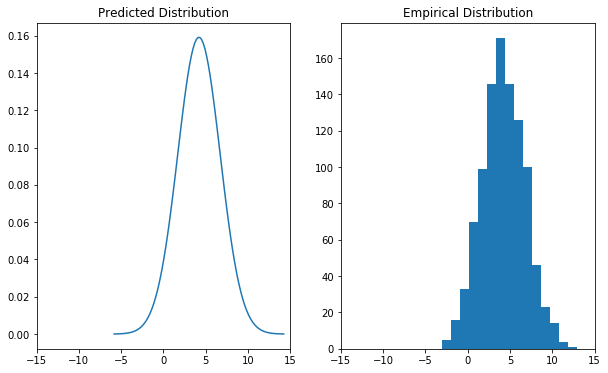

u:  [-0.70710678  0.70710678]


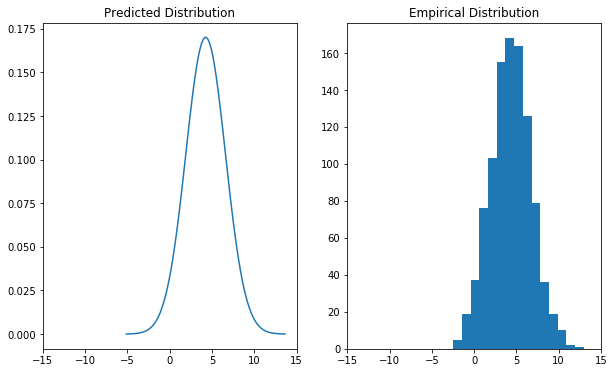

u:  [-0.79335334  0.60876143]


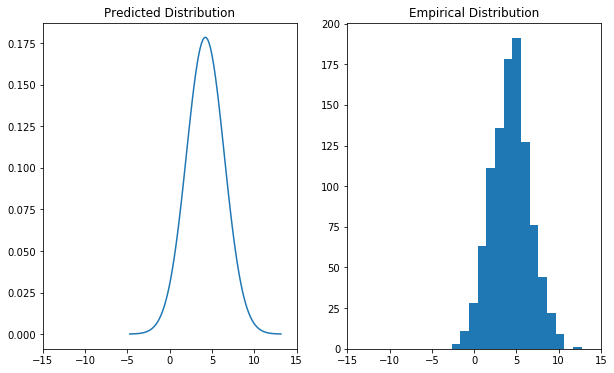

u:  [-0.8660254  0.5      ]


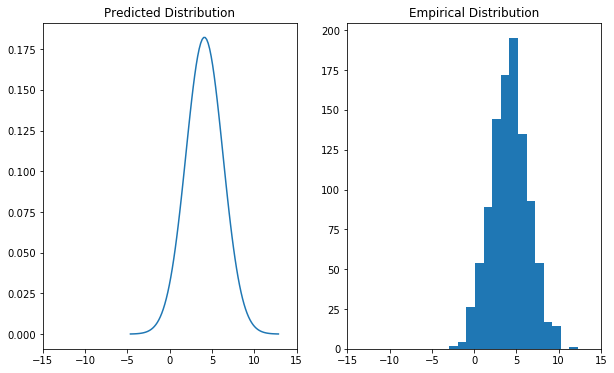

u:  [-0.92387953  0.38268343]


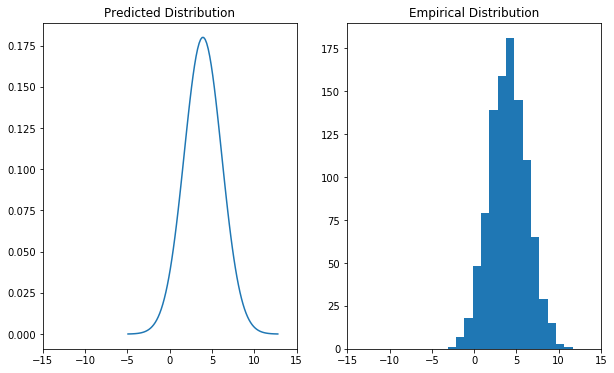

u:  [-0.96592583  0.25881905]


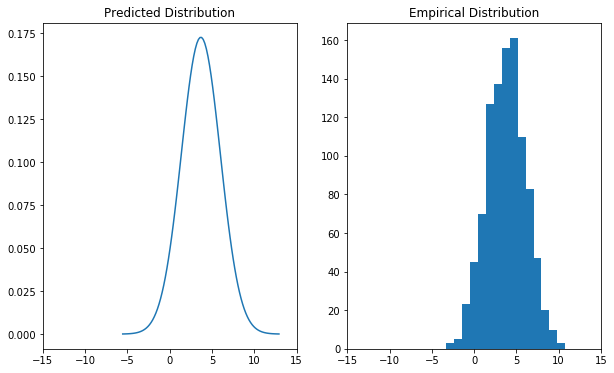

u:  [-0.99144486  0.13052619]


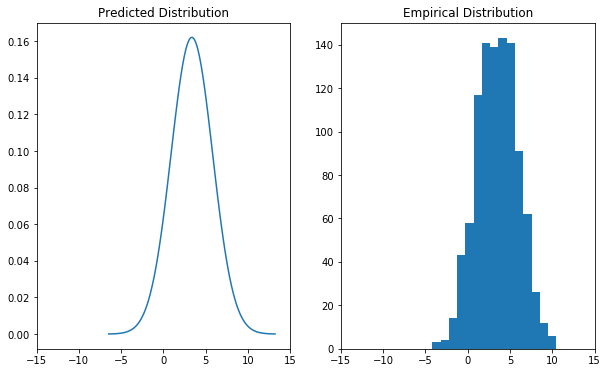

u:  [ -1.00000000e+00   1.22464680e-16]


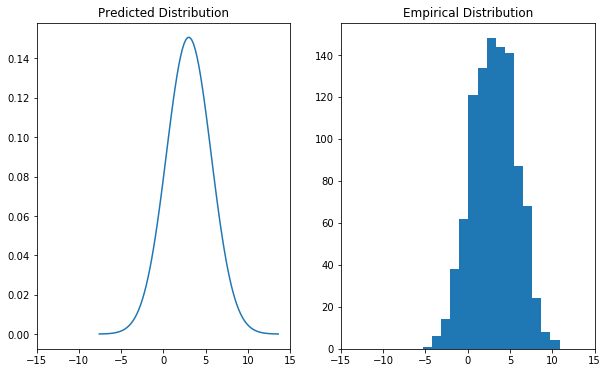

u:  [-0.99144486 -0.13052619]


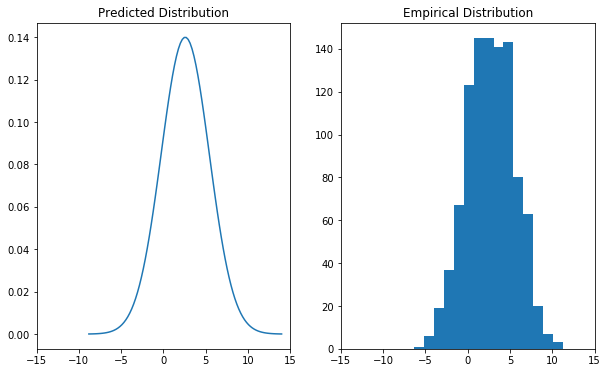

u:  [-0.96592583 -0.25881905]


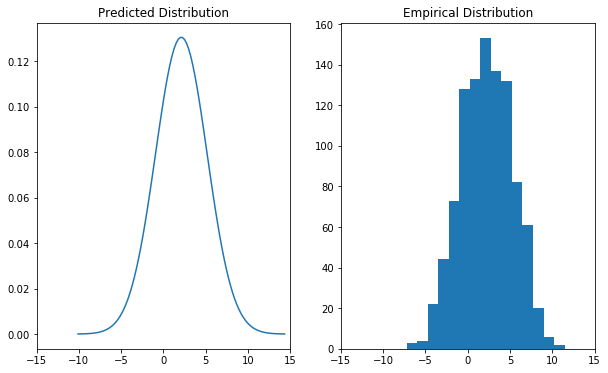

u:  [-0.92387953 -0.38268343]


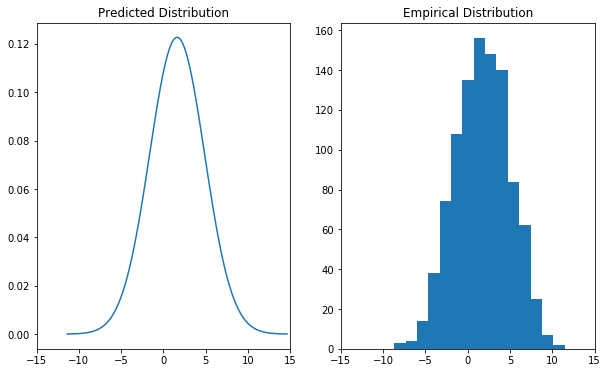

u:  [-0.8660254 -0.5      ]


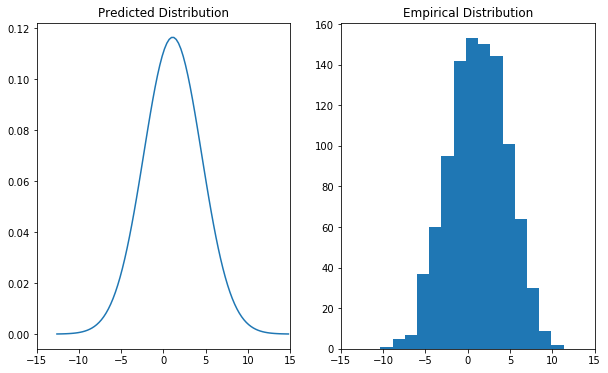

u:  [-0.79335334 -0.60876143]


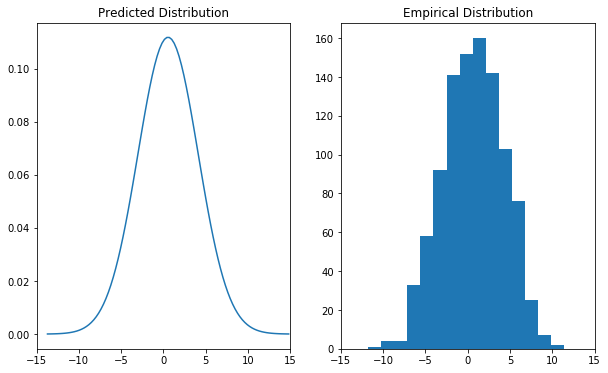

u:  [-0.70710678 -0.70710678]


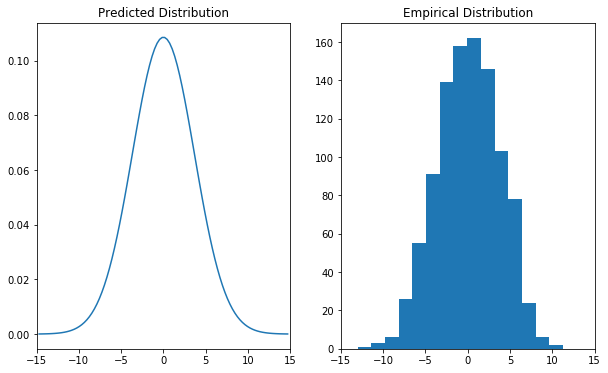

u:  [-0.60876143 -0.79335334]


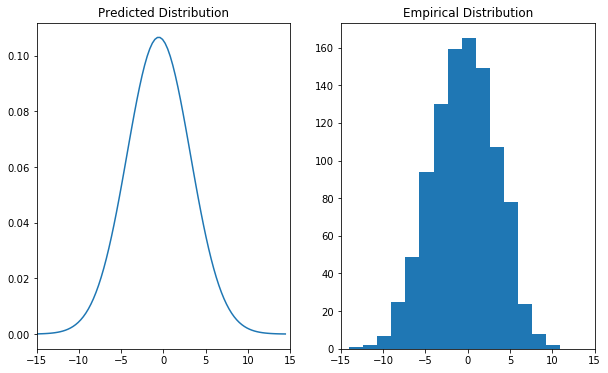

u:  [-0.5       -0.8660254]


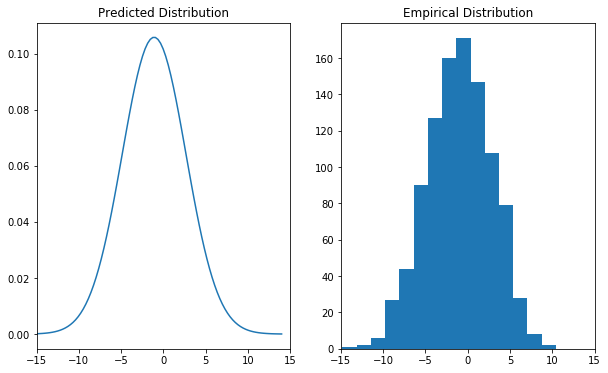

u:  [-0.38268343 -0.92387953]


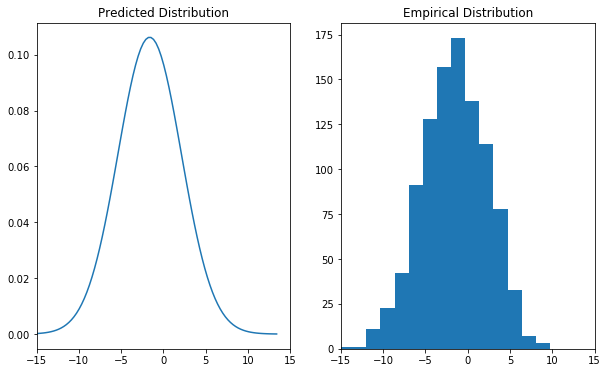

u:  [-0.25881905 -0.96592583]


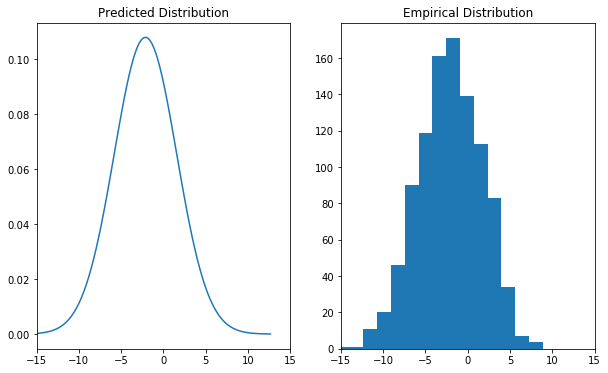

u:  [-0.13052619 -0.99144486]


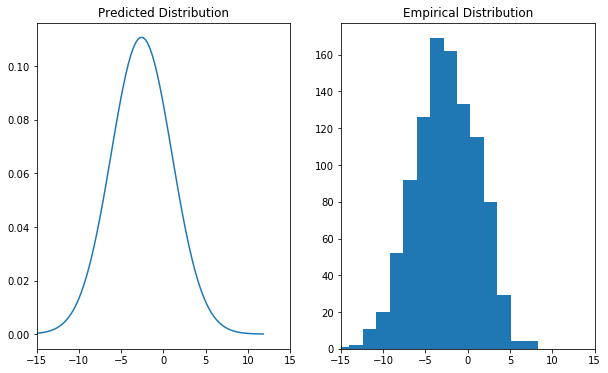

u:  [ -1.83697020e-16  -1.00000000e+00]


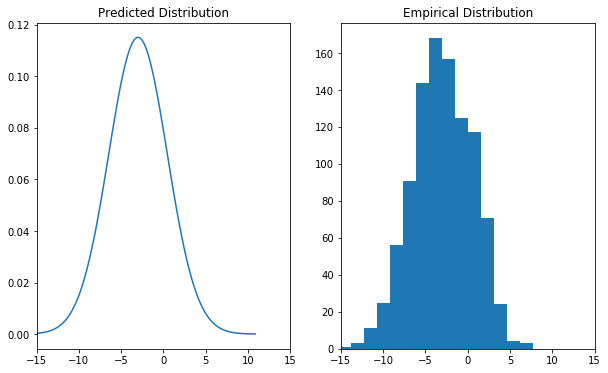

u:  [ 0.13052619 -0.99144486]


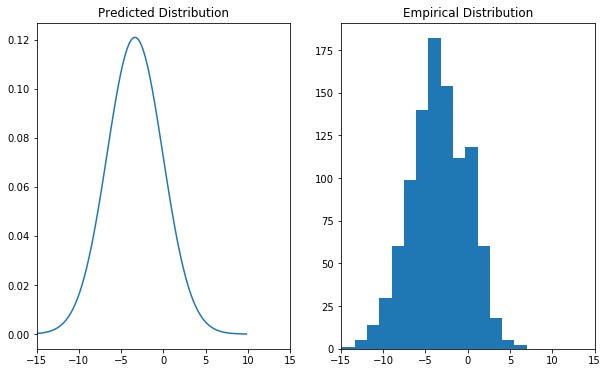

u:  [ 0.25881905 -0.96592583]


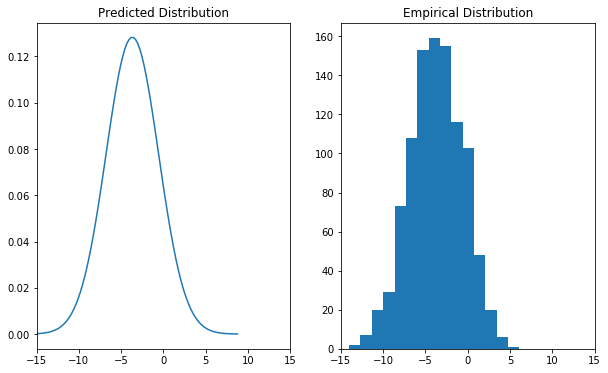

u:  [ 0.38268343 -0.92387953]


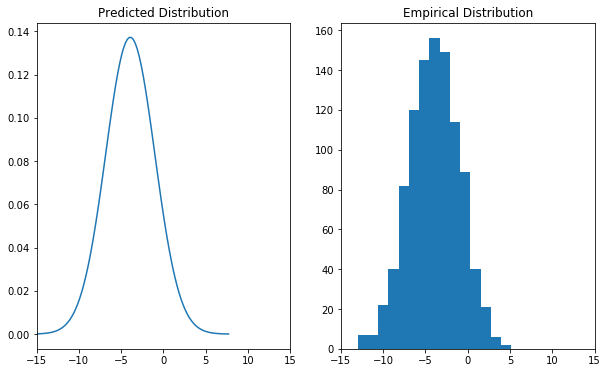

u:  [ 0.5       -0.8660254]


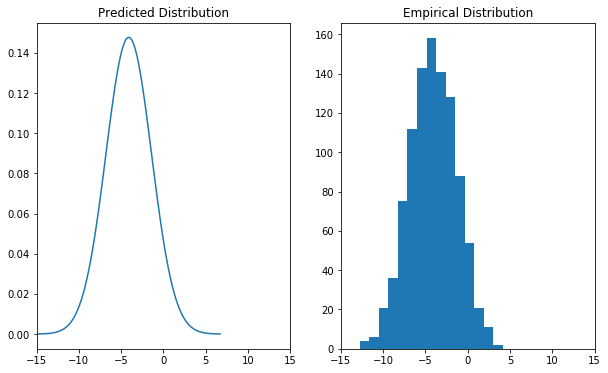

u:  [ 0.60876143 -0.79335334]


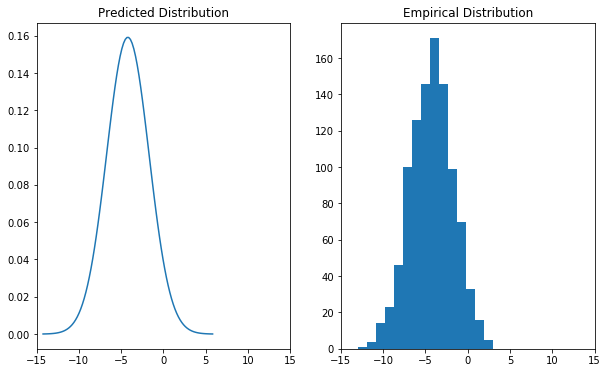

u:  [ 0.70710678 -0.70710678]


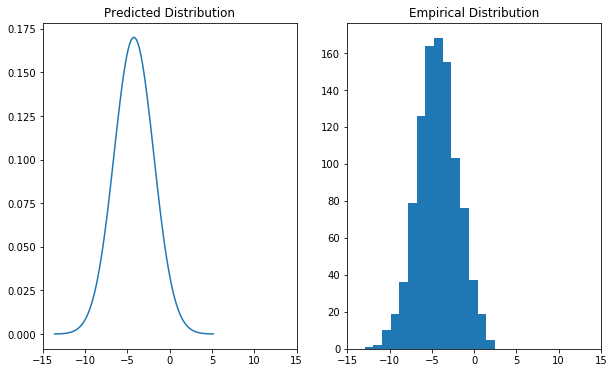

u:  [ 0.79335334 -0.60876143]


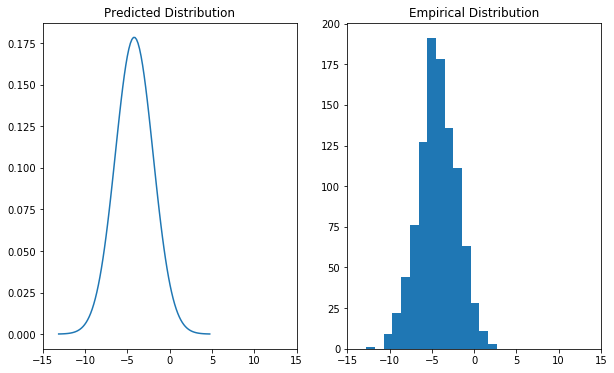

u:  [ 0.8660254 -0.5      ]


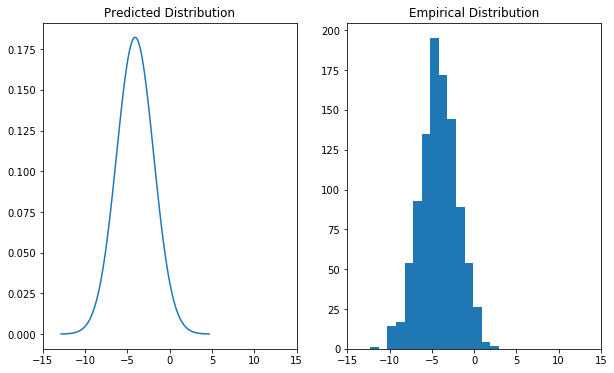

u:  [ 0.92387953 -0.38268343]


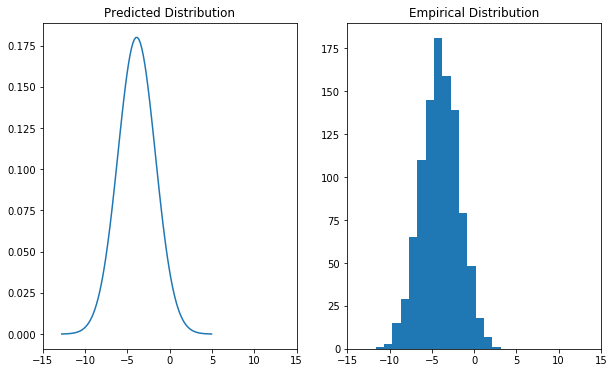

u:  [ 0.96592583 -0.25881905]


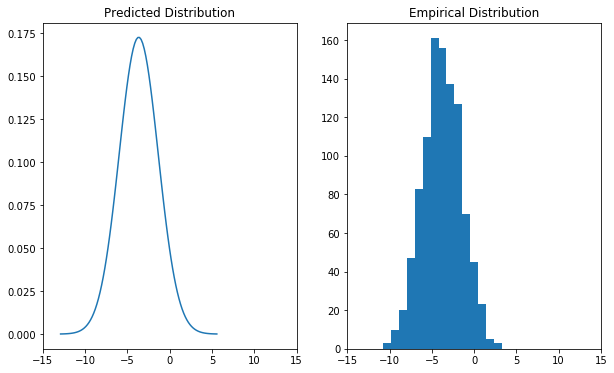

u:  [ 0.99144486 -0.13052619]


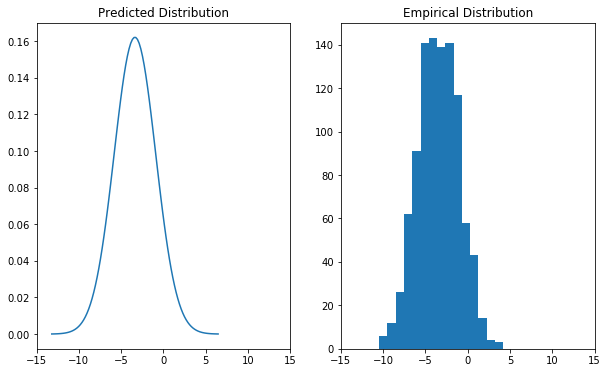

u:  [  1.00000000e+00  -2.44929360e-16]


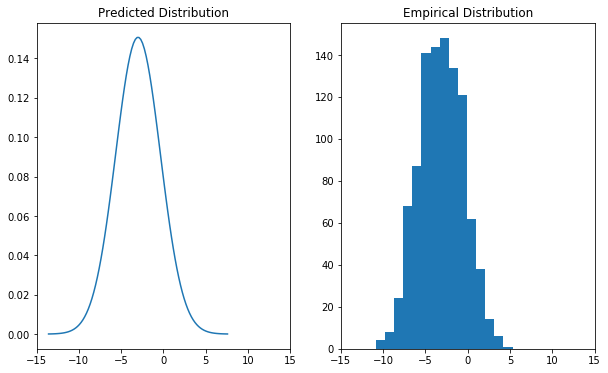

In [32]:
import matplotlib.mlab as mlab

# Collect a set of 48 unit vectors spaced evenly around the unit circle
thetas = np.array([2*np.pi*n/48 for n in range(49)])
U = np.vstack([[np.cos(theta), np.sin(theta)] for theta in thetas])
for u in U:
    print('u: ', u)
    # Use our mathematical expressions to compute the predicted distribution
    mu = np.dot(u, mean)
    sigma_sqr = np.dot(u, np.matmul(cov, u))
    sigma = np.sqrt(sigma_sqr)
    # Now collect empirical data; a histogram will be shown
    Z = np.dot(u, X.T)
    # Plot both predicted distribution and empirical distribution side-by-side
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 6))
    ax1.plot(x, mlab.normpdf(x, mu, sigma))
    ax1.set_xlim(-15,15)
    ax1.set_title('Predicted Distribution')
    ax2.hist(Z, bins=15)
    ax2.set_xlim(-15,15)
    ax2.set_title('Empirical Distribution')
    plt.show()

As we can see the predicted distributions match the empirical distributions very well. Now let's plot the predicted mean and empirical mean vs. angle on the same plot, and also predicted variance and empirical variance vs. angle on the same plot.

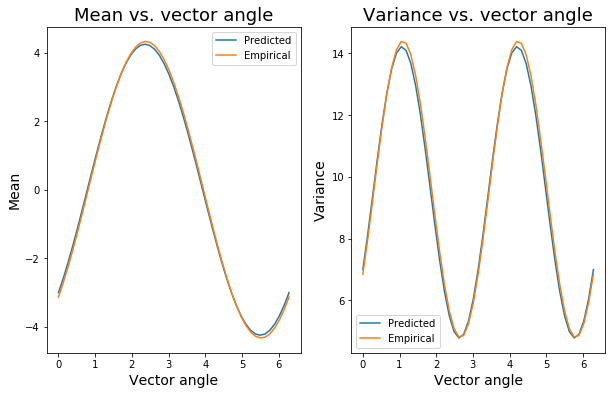

In [33]:
means_pred = []
vars_pred = []
means_emp = []
vars_emp = []
for u in U:
    # Get predicted values
    means_pred.append(np.dot(u, mean))
    vars_pred.append(np.dot(u, np.matmul(cov, u)))
    # Get empirical values
    Z = np.dot(u, X.T)
    means_emp.append(np.mean(Z))
    vars_emp.append(np.var(Z))
    
# Plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 6))
ax1.plot(thetas, means_pred, label='Predicted')
ax1.plot(thetas, means_emp, label='Empirical')
ax1.set_xlabel('Vector angle', fontsize=14)
ax1.set_ylabel('Mean', fontsize=14)
ax1.legend()
ax1.set_title('Mean vs. vector angle', fontsize=18)
ax2.plot(thetas, vars_pred, label='Predicted')
ax2.plot(thetas, vars_emp, label='Empirical')
ax2.set_xlabel('Vector angle', fontsize=14)
ax2.set_ylabel('Variance', fontsize=14)
ax2.legend()
ax2.set_title('Variance vs. vector angle', fontsize=18)
plt.show()

As we can see the predicted and empirical plots are nearly identical. This is what we'd hoped to see.